In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [59]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error


In [64]:
import pandas as pd

# Cargar los datos
X_train = pd.read_csv('./output/train_feature_engineered.csv')
X_test = pd.read_csv('./output/test_feature_engineered.csv')

# Mostrar las primeras filas de cada archivo
print("Primeras filas de X_train:")
display(X_train.head())

print("\nPrimeras filas de X_test:")
display(X_test.head())

# Opcionalmente, mostrar información general de las columnas y tipos de datos
print("\nInformación de X_train:")
print(X_train.info())

print("\nInformación de X_test:")
print(X_test.info())


Primeras filas de X_train:


,model,year,motor_type,running,color,type,status,motor_volume,price
0,0,0.636889,3,-0.600139,1,1.0,3.0,-0.138416,-0.011519
1,0,-0.274194,3,1.096762,14,1.0,2.0,-0.138416,-0.973339
2,1,0.788736,3,-0.683320,2,1.0,3.0,-0.138416,0.350906
3,0,0.333195,3,-0.488030,2,1.0,3.0,-0.138416,-0.290307
4,0,0.788736,1,-1.077258,7,1.0,3.0,-0.138416,0.072118



Primeras filas de X_test:


,model,year,motor_type,running,color,type,status,motor_volume,price
0,2,-3.007444,3,2.745839,4,1.0,2.0,-0.138416,-1.781825
1,4,1.092431,3,-0.833047,10,4.0,3.0,-0.138416,1.953940
2,2,0.333195,3,-0.093588,2,1.0,3.0,-0.138416,2.372122
3,2,0.333195,3,-0.426006,1,1.0,3.0,-0.138416,1.535757
4,2,-2.096361,3,0.452667,2,1.0,2.0,1.442659,-1.293945



Información de X_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1313 non-null   int64  
 1   year          1313 non-null   float64
 2   motor_type    1313 non-null   int64  
 3   running       1313 non-null   float64
 4   color         1313 non-null   int64  
 5   type          1270 non-null   float64
 6   status        1228 non-null   float64
 7   motor_volume  1313 non-null   float64
 8   price         1313 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 92.4 KB
None

Información de X_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         329 non-null    int64  
 1   year          329 non-null    float64
 2   motor_type    329 non-null    int64

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Crear imputadores para las columnas categóricas y numéricas
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Moda para columnas categóricas
numerical_imputer = SimpleImputer(strategy='mean')            # Media para columnas numéricas

# Identificar las columnas con valores nulos
categorical_cols = ['type', 'status']  # Ambas se pueden tratar como categóricas
numerical_cols = []  # Ninguna columna numérica parece tener valores nulos

# Crear un pipeline para imputación
imputation_pipeline = Pipeline([
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
])

# Imputar valores nulos en las columnas categóricas
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Si hubiese columnas numéricas con valores nulos, se imputarían así:
# X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# Verificar si quedan valores nulos
print(X_train.isnull().sum())
print(X_test.isnull().sum())


model           0
year            0
motor_type      0
running         0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64
model           0
year            0
motor_type      0
running         0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64


### Feature Selection

Vamos a seleccionar un subconjunto de las características más predictivas. Hay un elemento de aleatoriedad en la regresión Lasso, así que recuerda establecer la semilla.

Cantidad de Características seleccionadas:

In [66]:
X_train = pd.read_csv('./output/train_feature_engineered.csv')
X_test = pd.read_csv('./output/test_feature_engineered.csv')


In [67]:
X_train = X_train.drop('Unnamed: 0', axis=1, errors='ignore')
X_test = X_test.drop('Unnamed: 0', axis=1, errors='ignore')

In [68]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de variables numéricas
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [73]:
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42))),
                ('model', RandomForestRegressor(random_state=42))])


In [74]:
# Cargar los datos procesados
X_train = pd.read_csv('./output/train_feature_engineered.csv')
X_test = pd.read_csv('./output/test_feature_engineered.csv')

# Separar la variable objetivo 'price' de las características
y_train = X_train['price']  # La variable objetivo
X_train = X_train.drop('price', axis=1)  # Eliminar la variable objetivo del conjunto de características

# En caso de que haya alguna columna innecesaria en X_test, también la debes ajustar:
y_test = X_test['price']
X_test = X_test.drop('price', axis=1)


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# Definir el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Configurar el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de variables numéricas
    ('feature_selection', SelectFromModel(rf, threshold="mean")),  # Selección de características
    ('model', rf)  # El modelo de Random Forest
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)

# Evaluar el modelo
y_pred = pipeline.predict(X_test)

# Calcular y mostrar el rendimiento (ejemplo usando el error cuadrático medio)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.2535662876076494


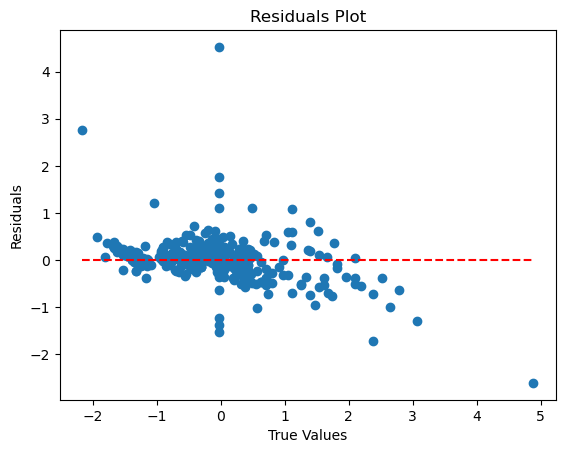

In [78]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred - y_test)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()


In [79]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo con cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean CV Score: {-cv_scores.mean()}')


Mean CV Score: 0.2848360761869283


In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {-grid_search.best_score_}')


Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best cross-validation score: 0.2684857216062303
